# Genetics Algorithms for solving a 256-dimensional Quadratic Assigment Problem

## Description of the GAs tested

A description of each GA analyzed in the experiments goes here...



## Results

In [25]:
# Reading the results

import pandas as pd
import glob
import os

results_path = "gaout"

def build_dataframe(who):
    # merging the files
    joined_files = os.path.join(results_path, "*_" + who + ".csv")
    
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    
    # Finally, the files are joined
    df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

    return df


df_evol = build_dataframe("evol")
df_best = build_dataframe("best")

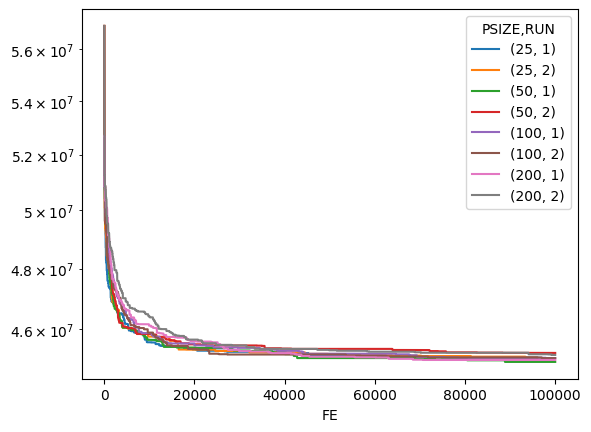

In [26]:
pd.pivot_table(df.reset_index(),
               index='FE', columns=['PSIZE', 'RUN'], values='BFIT'
              ).plot(subplots=False).set_yscale("log")

In [32]:
from IPython.display import display

display(df_best)

TypeError: 'module' object is not callable